<h2><b>[개인 과제]</b></h2>

````
# 미국 Boston 지역의 집값 data 불러오기
import pandas as pd
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()
````


<h3>Ridge, Lasso, ElasticNet을 사용해 alpha의 값 변화에 따른 MEDV를 예측하는 변수들의 계수 변화를 시각화해보세요.</h3>

[<h3>참고 코드</h3>](https://datascienceschool.net/03%20machine%20learning/06.05%20%EC%A0%95%EA%B7%9C%ED%99%94%20%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.html)



<br>

**<h3><조건></h3>**

<h3>1. X(독립변수 data)에 Standard Scaler 적용하기 </h3>

<br>

**<h3><참고></h3>**

<h3>Ridge와 Lasso에서 상수항이 축소되지 않는 이유</h3>

[<h3>참고 블로그</h3>](https://rpago.tistory.com/59)


In [2]:
# The normal imports
import numpy as np # efficient numerical computations
import pandas as pd # data structures for data analysis
from numpy.random import randn

# These are the plotting modules adn libraries
import matplotlib as mpl # plotting (both interactive and to files)
import matplotlib.pyplot as plt
import seaborn as sns # extra plot types, elegant and readable plot style

# machine learning algorithms, dataset access
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, MaxAbsScaler
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, r2_score, mean_squared_error
from sklearn.datasets import load_boston
from sklearn.linear_model import LinearRegression, RANSACRegressor, ElasticNet, Ridge, Lasso

sns.set_style('whitegrid')

# Command so that plots appear in the iPython Notebook
get_ipython().run_line_magic('matplotlib', 'inline')

In [3]:
# 미국 Boston 지역의 집값 data 불러오기
house = pd.read_csv('https://raw.githubusercontent.com/rasbt/'
                     'python-machine-learning-book-2nd-edition'
                     '/master/code/ch10/housing.data.txt',header=None,sep='\s+')
house.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [25]:
# 독립 변수, 종속 변수 지정
house_column = house.columns.to_list()
X = house[house_column[0:13]]
y = house[house_column[-1]]

X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33, random_state=64)

# 정규화(Category 변수인 CHAS와 RAD 제외 후 전체 독립변수 dataset에 대해 Scaling 진행.)
scaler = StandardScaler()

X_train, X_test = X_train.drop(columns=['CHAS', 'RAD']), X_test.drop(columns=['CHAS', 'RAD'])
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

In [42]:
# alpha 값에 따른 계수 변화(Ridge)
results_ridge = []

alphas = [0.001, 0.01, 0.1, 1, 10]
for a in alphas:
    rd = Ridge(alpha=a).fit(X_train, y_train)
    results_ridge.append(rd.coef_)
    
ridge_alpha = pd.DataFrame(np.transpose(results_ridge))
ridge_alpha.columns = [0.001, 0.010, 0.100, 1.000, 10.000]
ridge_alpha

,0.001,0.010,0.100,1.000,10.000
0,-0.783265,-0.783221,-0.782777,-0.778439,-0.743189
1,0.922937,0.922863,0.922123,0.914821,0.850464
2,-0.376297,-0.376293,-0.376256,-0.375925,-0.375964
3,-1.774132,-1.773834,-1.770856,-1.741641,-1.496846
4,3.191078,3.191068,3.190963,3.189835,3.172419
5,-0.377168,-0.377147,-0.376942,-0.374913,-0.356722
6,-3.150507,-3.150128,-3.146345,-3.109059,-2.783527
7,0.052497,0.052357,0.050960,0.037271,-0.076352
8,-1.928348,-1.928270,-1.927489,-1.919802,-1.853431
9,0.840344,0.840337,0.840263,0.839519,0.831629


In [48]:
# alpha 값에 따른 계수 변화(Lasso)
results_lasso = []

alphas = [0.001, 0.01, 0.1, 1, 10]
for a in alphas:
    ls = Lasso(alpha=a).fit(X_train, y_train)
    results_lasso.append(ls.coef_)
    
lasso_alpha = pd.DataFrame(np.transpose(results_lasso))
lasso_alpha.columns = [0.001, 0.010, 0.100, 1.000, 10.000]
lasso_alpha

,0.001,0.010,0.100,1.000,10.000
0,-0.780588,-0.760555,-0.666012,-0.018165,-0.0
1,0.921956,0.909123,0.704768,0.000000,0.0
2,-0.372764,-0.346208,-0.241142,-0.000000,-0.0
3,-1.768801,-1.728308,-1.490299,-0.000000,-0.0
4,3.191230,3.192284,3.166727,2.820205,0.0
5,-0.374910,-0.355086,-0.127851,-0.000000,-0.0
6,-3.142808,-3.073967,-2.407360,-0.000000,0.0
7,0.045418,0.000000,-0.000000,-0.170624,-0.0
8,-1.926026,-1.910854,-1.889859,-1.345653,-0.0
9,0.839137,0.830060,0.777308,0.249745,0.0


In [45]:
# alpha 값에 따른 계수 변화(ElasticNet)
results_EN = []

alphas = [0.001, 0.01, 0.1, 1, 10]
for a in alphas:
    en = ElasticNet(alpha=a).fit(X_train, y_train)
    results_EN.append(en.coef_)
    
EN_alpha = pd.DataFrame(np.transpose(results_EN))
EN_alpha.columns = [0.001, 0.010, 0.100, 1.000, 10.000]
EN_alpha

,0.001,0.010,0.100,1.000,10.000
0,-0.781105,-0.763792,-0.676762,-0.416536,-0.000000
1,0.921064,0.902762,0.719511,0.194148,0.000000
2,-0.374488,-0.360574,-0.326170,-0.297885,-0.000000
3,-1.765910,-1.696650,-1.247445,-0.263986,-0.000000
4,3.190949,3.189353,3.140426,2.397564,0.210388
5,-0.375652,-0.362415,-0.246842,-0.000000,-0.000000
6,-3.139592,-3.043252,-2.281609,-0.000000,0.000000
7,0.046364,0.000000,-0.153684,-0.450605,-0.000000
8,-1.925726,-1.905041,-1.795159,-1.239925,-0.000000
9,0.839599,0.833747,0.795848,0.491594,0.000000


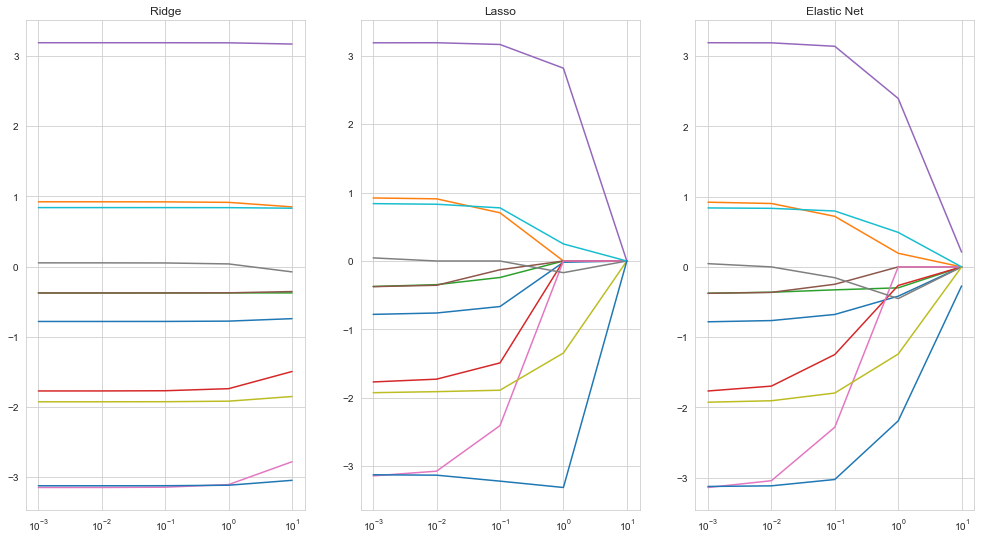

In [54]:
# 시각화
plt.figure(figsize=(17,9))

ax1 = plt.subplot(131)
plt.semilogx(ridge_alpha.T)
plt.xticks(alphas)
plt.title("Ridge")

ax2 = plt.subplot(132)
plt.semilogx(lasso_alpha.T)
plt.xticks(alphas)
plt.title("Lasso")

ax3 = plt.subplot(133)
plt.semilogx(EN_alpha.T)
plt.xticks(alphas)
plt.title("Elastic Net")

plt.show()